In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets
import matplotlib.pyplot as plt

In [2]:
# Get training and test set
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [3]:
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

In [4]:
# Get model
def model(input_shape):
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), (1, 1), activation='relu', padding='valid', name='conv2d_1', input_shape=input_shape))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), activation='relu', padding='same', name='conv2d_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.MaxPooling2D((2, 2), name='maxpool_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), activation='relu', padding='valid', name='conv2d_3'))
    model.add(layers.BatchNormalization(name='bn_3'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), activation='relu', padding='same', name='conv2d_4'))
    model.add(layers.BatchNormalization(name='bn_4'))
    model.add(layers.MaxPooling2D((2, 2), name='maxpool_2'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [5]:
model = model(X_train.shape[1:])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 30, 30, 32)        128       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
bn_3 (BatchNormalization)    (None, 13, 13, 64)        2

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2179 - accuracy: 0.9246
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.1610 - accuracy: 0.9450
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1358 - accuracy: 0.95 - 27s 17ms/step - loss: 0.1360 - accuracy: 0.9543
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1167 - accuracy: 0.9603
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1057 - accuracy: 0.9642
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0819 - accuracy: 0.9717
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0855 - accuracy: 0.9711
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0737 - accuracy: 0.9756
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0667 - accuracy: 0.9789
Epoch 10/10
1563/1563 

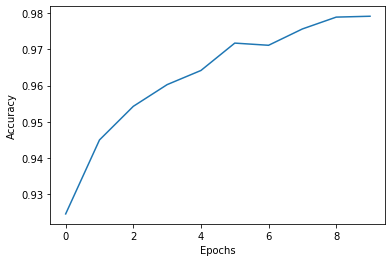

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4522 - accuracy: 0.7612


In [28]:
def predict(model, X, Y, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15 ,15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i], axis=0)
        img = X[i].reshape(32, 32, 3)
        ax[i].imshow(img, cmap="Greys", interpolation='nearest')
        ax[i].set_title(f't: {np.argmax(Y[i])} p: {y_pred}')

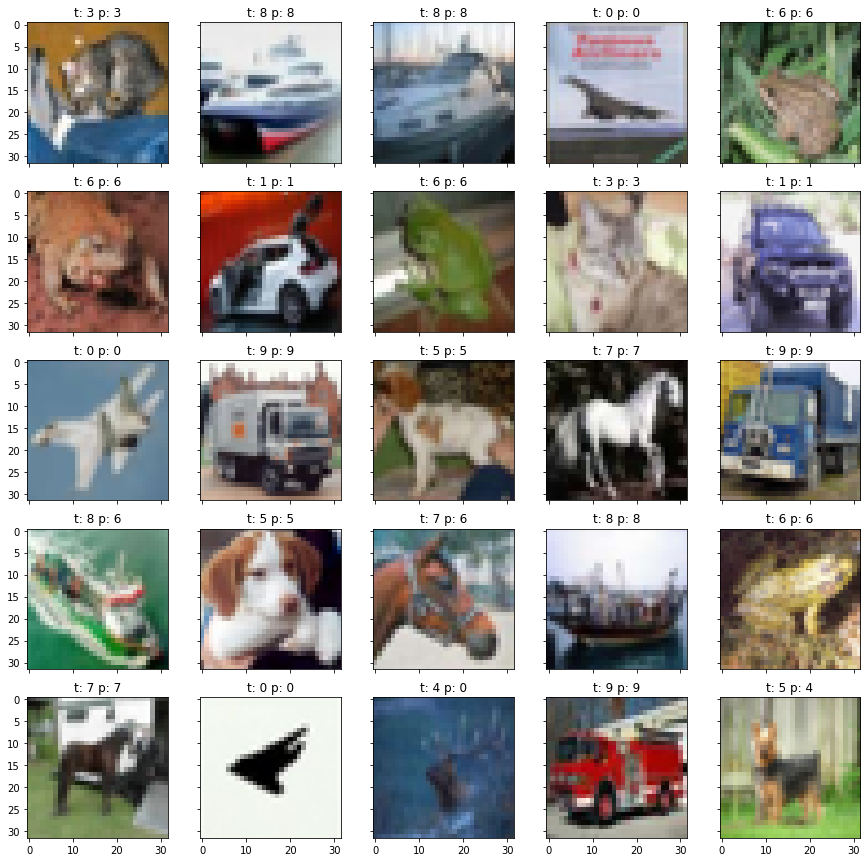

In [29]:
predict(model, X_test, Y_test, 25)